In [1]:
library(ggplot2)
library(tidyr)
library(GGally)
library(dplyr)
library(readr)

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [2]:
diamonds <- read_csv("C:/Users/kgtrm/Documents/R projects data/diamonds.csv")


-- Column specification ------------------------------------------------------------------------------------------------
cols(
  carat = col_double(),
  cut = col_character(),
  color = col_character(),
  clarity = col_character(),
  depth = col_double(),
  table = col_double(),
  price = col_double(),
  x = col_double(),
  y = col_double(),
  z = col_double()
)




In [6]:
# need some libraries to create the cuberoot transformation later
library(scales)
library(memisc)


Attaching package: 'scales'


The following object is masked from 'package:readr':

    col_factor


Loading required package: lattice

Loading required package: MASS


Attaching package: 'MASS'


The following object is masked from 'package:dplyr':

    select



Attaching package: 'memisc'


The following object is masked from 'package:scales':

    percent


The following objects are masked from 'package:dplyr':

    collect, recode, rename, syms


The following object is masked from 'package:ggplot2':

    syms


The following objects are masked from 'package:stats':

    contr.sum, contr.treatment, contrasts


The following object is masked from 'package:base':

    as.array




In [7]:
# need a cube root function

cuberoot_trans <- function(){
    trans_new('cuberoot',
             transform = function(x) {x ^ (1/3)},
             inverse = function(x) {x ^ 3})
}

Warning message:
"Removed 1693 rows containing missing values (geom_point)."


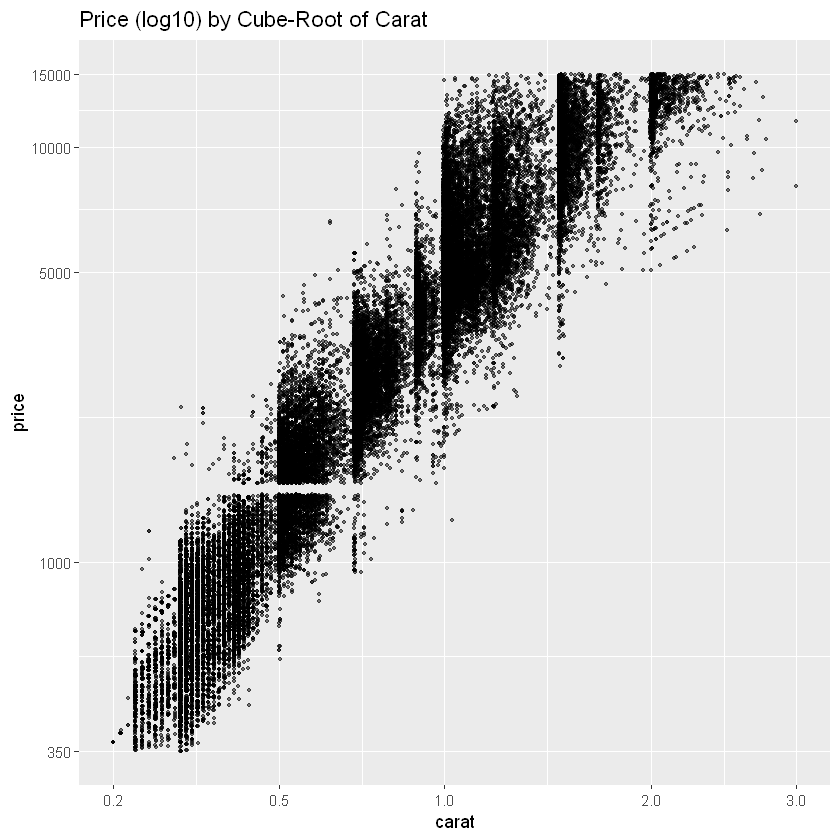

In [8]:
ggplot(aes(carat, price), data = diamonds) +
    geom_point(alpha = 0.5, size = 0.75, position = "jitter") +
    scale_x_continuous(trans = cuberoot_trans(), limits = c(0.2, 3),
                      breaks = c(0.2, 0.5, 1, 2, 3)) +
    scale_y_continuous(trans = log10_trans(), limits = c(350, 15000),
                      breaks = c(350, 1000, 5000, 10000, 15000)) +
    ggtitle("Price (log10) by Cube-Root of Carat")

In [11]:
library(RColorBrewer)

Warning message:
"Removed 1693 rows containing missing values (geom_point)."


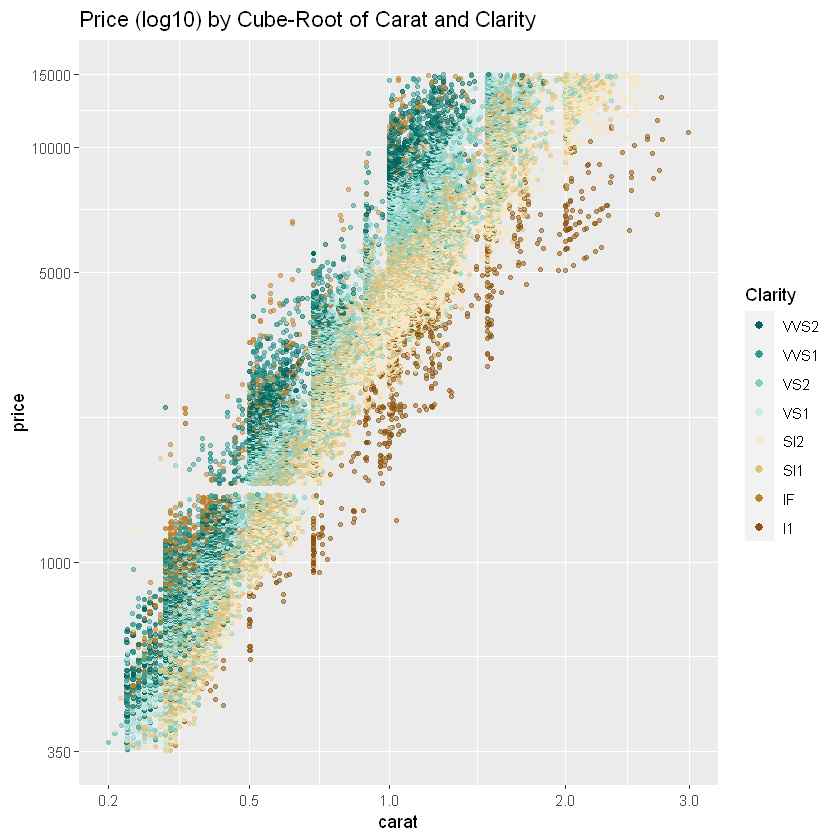

In [15]:
ggplot(aes(x = carat, y = price), data = diamonds) +
    geom_point(aes(color = clarity), alpha = 0.5, size = 1, position = "jitter") +
    scale_color_brewer(type = "div",
                       guide = guide_legend(title = "Clarity", reverse = T,
                                           override.aes = list(alpha = 1, size = 2))) +
    scale_x_continuous(trans = cuberoot_trans(), limits = c(0.2, 3),
                      breaks = c(0.2, 0.5, 1, 2, 3)) +
    scale_y_continuous(trans = log10_trans(), limits = c(350, 15000),
                      breaks = c(350, 1000, 5000, 10000, 15000)) +
    ggtitle("Price (log10) by Cube-Root of Carat and Clarity")

Warning message:
"Removed 1688 rows containing missing values (geom_point)."


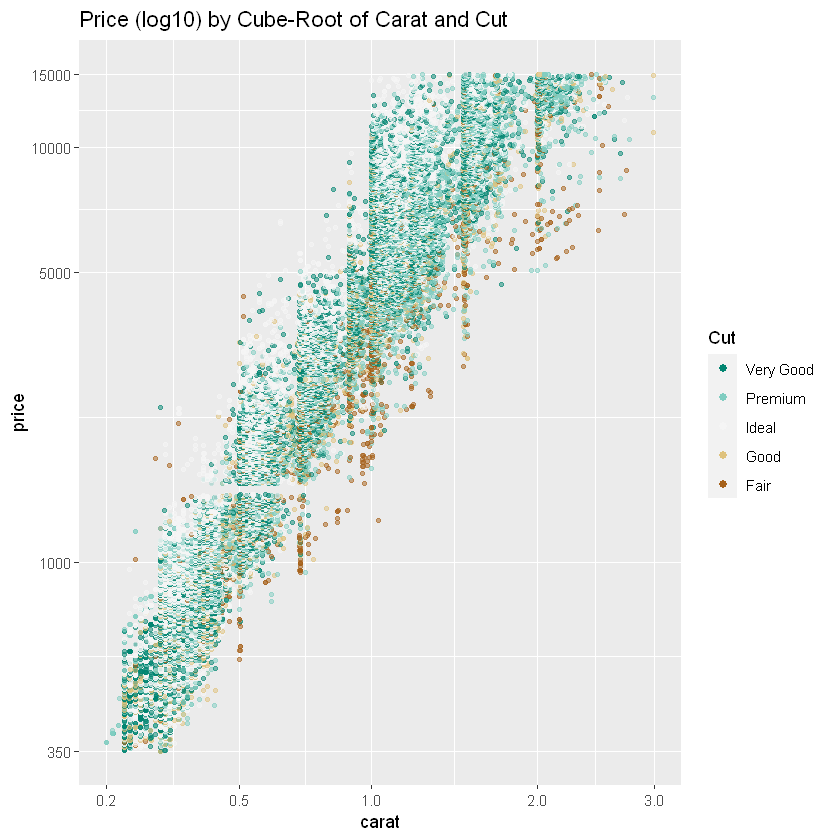

In [13]:
# adjust this to plot color by cut
ggplot(aes(x = carat, y = price), data = diamonds) +
    geom_point(aes(color = cut), alpha = 0.5, size = 1, position = "jitter") +
    scale_color_brewer(type = "div",
                       guide = guide_legend(title = "Cut", reverse = T,
                                           override.aes = list(alpha = 1, size = 2))) +
    scale_x_continuous(trans = cuberoot_trans(), limits = c(0.2, 3),
                      breaks = c(0.2, 0.5, 1, 2, 3)) +
    scale_y_continuous(trans = log10_trans(), limits = c(350, 15000),
                      breaks = c(350, 1000, 5000, 10000, 15000)) +
    ggtitle("Price (log10) by Cube-Root of Carat and Cut")

Warning message:
"Removed 1690 rows containing missing values (geom_point)."


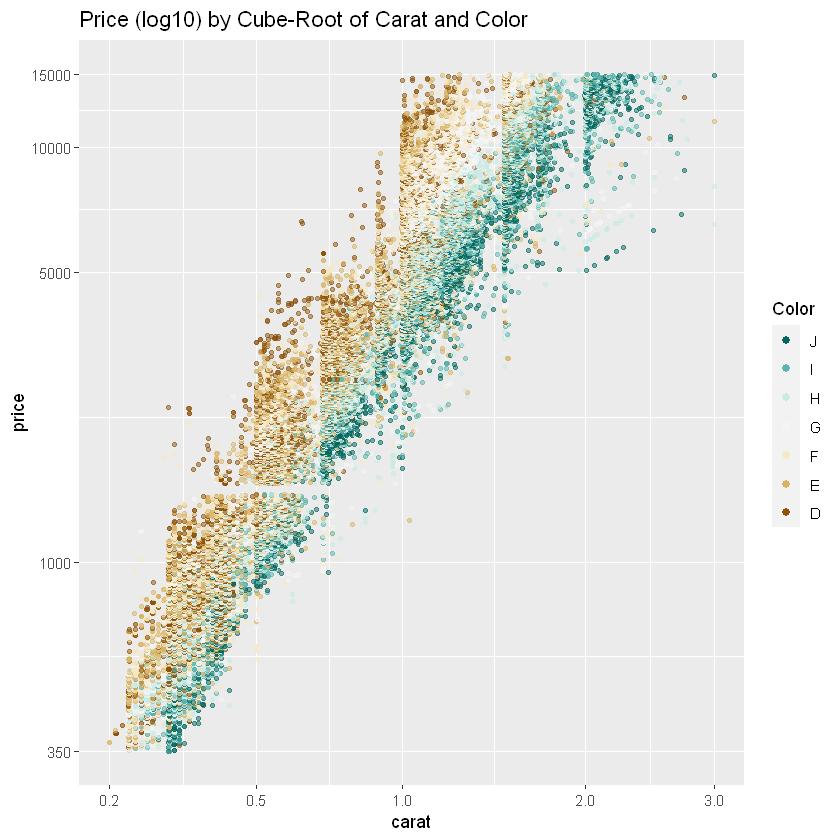

In [14]:
# adjust this to plot color by diamond color
ggplot(aes(x = carat, y = price), data = diamonds) +
    geom_point(aes(color = color), alpha = 0.5, size = 1, position = "jitter") +
    scale_color_brewer(type = "div",
                       guide = guide_legend(title = "Color", reverse = T,
                                           override.aes = list(alpha = 1, size = 2))) +
    scale_x_continuous(trans = cuberoot_trans(), limits = c(0.2, 3),
                      breaks = c(0.2, 0.5, 1, 2, 3)) +
    scale_y_continuous(trans = log10_trans(), limits = c(350, 15000),
                      breaks = c(350, 1000, 5000, 10000, 15000)) +
    ggtitle("Price (log10) by Cube-Root of Carat and Color")

In [16]:
# we can build a linear model 
# (the past few graphs seem to suggest its existence)
# when using log and cuberoot
m1 <- lm(I(log(price)) ~ I(carat^(1/3)), data = diamonds)
m2 <- update(m1, ~. + carat)
m3 <- update(m2, ~. + cut)
m4 <- update(m3, ~. + clarity)
m5 <- update(m4, ~. + color)

# this is where memisc is required
mtable(m1, m2, m3, m4, m5)

Warning message in checkLaTeXcape(leaders, "row leaders"):
"Unescaped TeX special in row leaders"


Calls:
m1: lm(formula = I(log(price)) ~ I(carat^(1/3)), data = diamonds)
m2: lm(formula = I(log(price)) ~ I(carat^(1/3)) + carat, data = diamonds)
m3: lm(formula = I(log(price)) ~ I(carat^(1/3)) + carat + cut, data = diamonds)
m4: lm(formula = I(log(price)) ~ I(carat^(1/3)) + carat + cut + clarity, 
    data = diamonds)
m5: lm(formula = I(log(price)) ~ I(carat^(1/3)) + carat + cut + clarity + 
    color, data = diamonds)

=============================================================================================
                            m1            m2            m3            m4            m5       
---------------------------------------------------------------------------------------------
  (Intercept)              2.821***      1.039***      0.685***     -0.385***     -0.172***  
                          (0.006)       (0.019)       (0.020)       (0.016)       (0.011)    
  I(carat^(1/3))           5.558***      8.568***      8.703***      9.376***      9.144***  
                          (0.007)       (0.032)       (0.031)       (0.023)       (0.016)    
  carat                                 -1.137***     -1.163***     -1.274***     -1.093***  
                                        (0.012)       (0.011)       (0.008)       (0.006)    
  cut: Good/Fair                                       0.159***      0.083***      0.077***  
                                                      (0.007)       (0.005)       (0.004)    
  cut: Ideal/Fair                                      0.316***      0.168***      0.160***  
                                                      (0.007)       (0.005)       (0.003)    
  cut: Premium/Fair                                    0.236***      0.141***      0.135***  
                                                      (0.007)       (0.005)       (0.003)    
  cut: Very Good/Fair                                  0.236***      0.120***      0.112***  
                                                      (0.007)       (0.005)       (0.003)    
  clarity: IF                                                        1.046***      1.101***  
                                                                    (0.008)       (0.006)    
  clarity: SI1                                                       0.569***      0.585***  
                                                                    (0.007)       (0.005)    
  clarity: SI2                                                       0.429***      0.420***  
                                                                    (0.007)       (0.005)    
  clarity: VS1                                                       0.759***      0.803***  
                                                                    (0.007)       (0.005)    
  clarity: VS2                                                       0.714***      0.733***  
                                                                    (0.007)       (0.005)    
  clarity: VVS1                                                      0.963***      1.006***  
                                                                    (0.008)       (0.005)    
  clarity: VVS2                                                      0.914***      0.934***  
                                                                    (0.007)       (0.005)    
  color: E/D                                                                      -0.055***  
                                                                                  (0.002)    
  color: F/D                                                                      -0.096***  
                                                                                  (0.002)    
  color: G/D                                                                      -0.163***  
                                                                                  (0.002)    
  color: H/D                                                                      -0.256***  
  

In [18]:
# going to use a better diamond data set
# but need some packages to get it
library(RCurl)
library(bitops)


Attaching package: 'RCurl'


The following object is masked from 'package:tidyr':

    complete




In [20]:
# diamondsURL <- getBinaryURL('https://github.com/SolomonMg/diamonds-data/blob/master/BigDiamonds.Rda')
# load(rawConnection(diamondsURL))
# I think I already have this file in the R data folder
load("C:/Users/kgtrm/Documents/R projects data/BigDiamonds.Rda")

In [21]:
# same linear model as previously, but many, many more data points
m1 <- lm(I(log(price)) ~ I(carat^(1/3)), data = diamondsbig)
m2 <- update(m1, ~. + carat)
m3 <- update(m2, ~. + cut)
m4 <- update(m3, ~. + clarity)
m5 <- update(m4, ~. + color)

mtable(m1, m2, m3, m4, m5)

Warning message in checkLaTeXcape(leaders, "row leaders"):
"Unescaped TeX special in row leaders"


Calls:
m1: lm(formula = I(log(price)) ~ I(carat^(1/3)), data = diamondsbig)
m2: lm(formula = I(log(price)) ~ I(carat^(1/3)) + carat, data = diamondsbig)
m3: lm(formula = I(log(price)) ~ I(carat^(1/3)) + carat + cut, data = diamondsbig)
m4: lm(formula = I(log(price)) ~ I(carat^(1/3)) + carat + cut + clarity, 
    data = diamondsbig)
m5: lm(formula = I(log(price)) ~ I(carat^(1/3)) + carat + cut + clarity + 
    color, data = diamondsbig)

=============================================================================================
                       m1             m2             m3             m4             m5        
---------------------------------------------------------------------------------------------
  (Intercept)          3.096***       1.406***       1.218***       0.177***      -0.663***  
                      (0.002)        (0.005)        (0.005)        (0.008)        (0.006)    
  I(carat^(1/3))       5.317***       7.911***       7.920***       8.137***       8.368***  
                      (0.002)        (0.008)        (0.008)        (0.006)        (0.005)    
  carat                              -0.767***      -0.779***      -0.815***      -0.815***  
                                     (0.002)        (0.002)        (0.002)        (0.001)    
  cut: V.Good                                        0.119***       0.085***       0.059***  
                                                    (0.002)        (0.001)        (0.001)    
  cut: Ideal                                         0.256***       0.163***       0.130***  
                                                    (0.002)        (0.001)        (0.001)    
  clarity: I1                                                       0.307***       0.355***  
                                                                   (0.007)        (0.005)    
  clarity: SI2                                                      0.669***       0.684***  
                                                                   (0.007)        (0.005)    
  clarity: SI1                                                      0.816***       0.834***  
                                                                   (0.007)        (0.005)    
  clarity: VS2                                                      0.959***       0.979***  
                                                                   (0.007)        (0.005)    
  clarity: VS1                                                      1.052***       1.067***  
                                                                   (0.007)        (0.005)    
  clarity: VVS2                                                     1.129***       1.145***  
                                                                   (0.007)        (0.005)    
  clarity: VVS1                                                     1.206***       1.224***  
                                                                   (0.007)        (0.005)    
  clarity: IF                                                       1.340***       1.346***  
                                                                   (0.007)        (0.005)    
  color: K/L                                                                       0.128***  
                                                                                  (0.003)    
  color: J/L                                                                       0.325***  
                                                                                  (0.003)    
  color: I/L                                                                       0.457***  
                                                                                  (0.003)    
  color: H/L                                                                       0.560***  
                                                                                  (0.003)    
  color: G/L                                                                     

In [22]:
# predict base on model built (m5 from above)
# create sample data to test model

thisDiamond <- data.frame(carat = 1.0, cut = "V.Good", color = "I", clarity = "VS1")

modelEstimate <- predict(m5, newdata = thisDiamond, interval = "prediction", level = 0.95)

exp(modelEstimate)

,fit,lwr,upr
1,4786.053,3033.06,7552.207


In [38]:
# let's see if any diamonds had these qualities and what their prices were
sampleDiamond <- diamondsbig %>%
    filter(carat == 1.0, cut == "V.Good", color == "I", clarity == "VS1") %>%
    # dplyr::select(price)
    summarize(median_price = median(price), min_price = min(price, na.rm = TRUE), max_price = max(price, na.rm = TRUE))
sampleDiamond

median_price,min_price,max_price
<dbl>,<dbl>,<dbl>
5287,2396,7350
